In [1]:
import pandas as pd 
import numpy as np
diabetes_df = pd.read_csv("./data/diabetes.csv")

print(diabetes_df.isna().sum())
print(diabetes_df.duplicated().sum())


diabetes_df.head()



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



------------------------------------------
✅ Runtime: 194.4 ms | 💾 Mem: 113.91 MB (Δ +113.91 MB) | ⚙️ CPU: 17.8%


In [2]:
# Creating feature and target arrays
X = diabetes_df.drop("Glucose", axis=1).values
y = diabetes_df["Glucose"].values


------------------------------------------
✅ Runtime: 0.9 ms | 💾 Mem: 114.12 MB (Δ +0.22 MB) | ⚙️ CPU: 26.8%


In [3]:
X_bmi = X[:, 4].reshape(-1, 1)
X_bmi.shape

(768, 1)


------------------------------------------
✅ Runtime: 2.3 ms | 💾 Mem: 114.14 MB (Δ +0.02 MB) | ⚙️ CPU: 0.0%


### Plotting glucose vs. body mass index

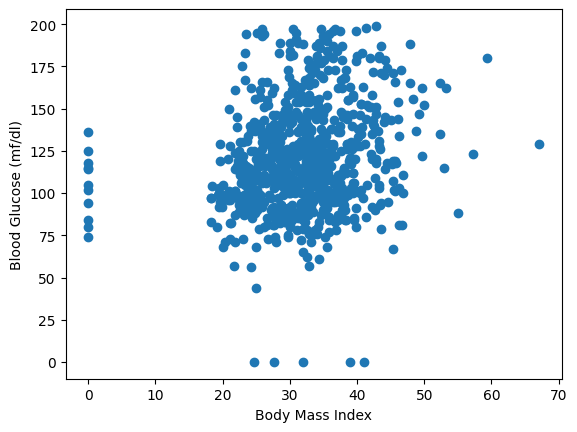


------------------------------------------
✅ Runtime: 263.3 ms | 💾 Mem: 141.30 MB (Δ +27.16 MB) | ⚙️ CPU: 0.0%


In [4]:
import matplotlib.pyplot as plt 
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mf/dl)")
plt.xlabel("Body Mass Index")
plt.show()

### Fitting a regression model

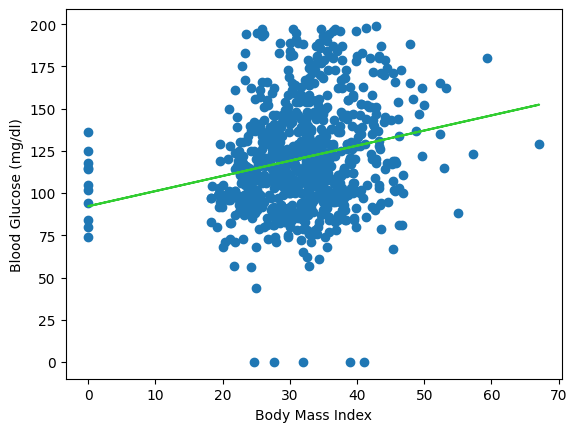


------------------------------------------
✅ Runtime: 573.4 ms | 💾 Mem: 206.81 MB (Δ +65.52 MB) | ⚙️ CPU: 20.0%


In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

# plot line 
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color='limegreen')
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

### Linear Regression using all features
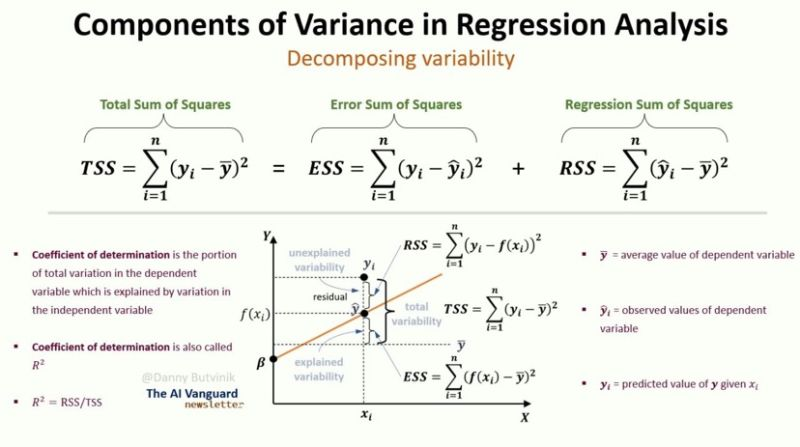
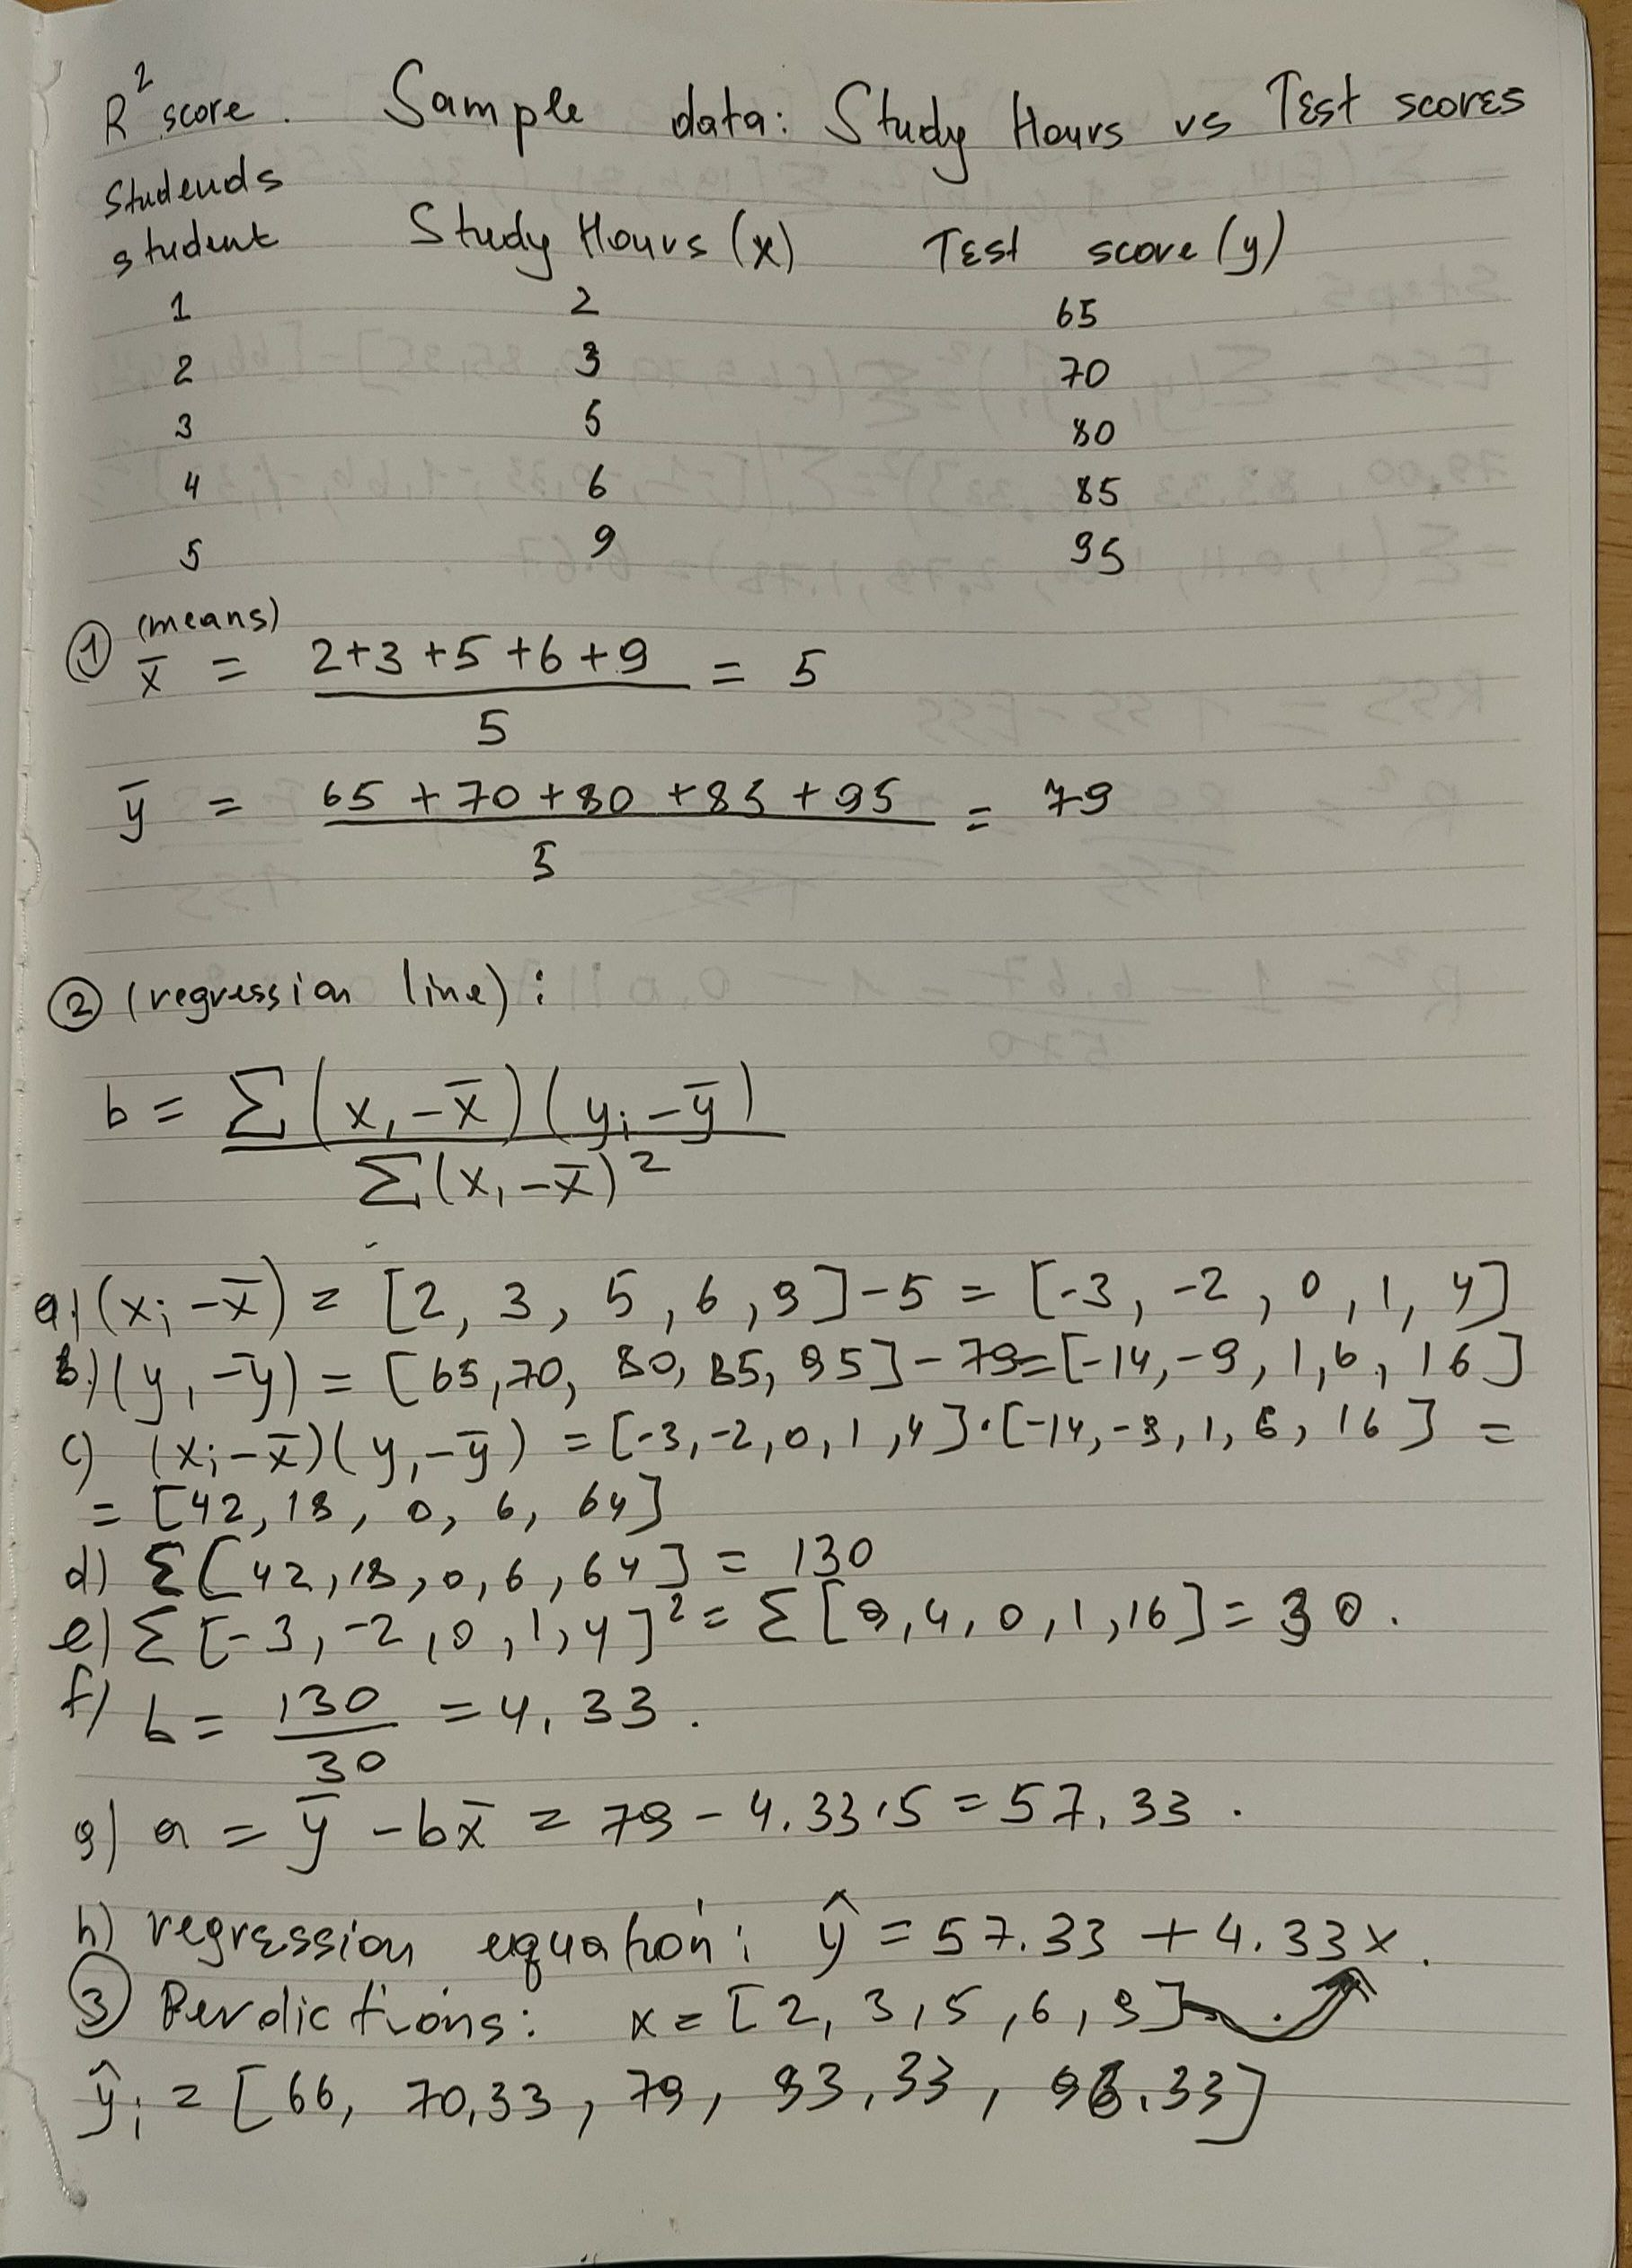
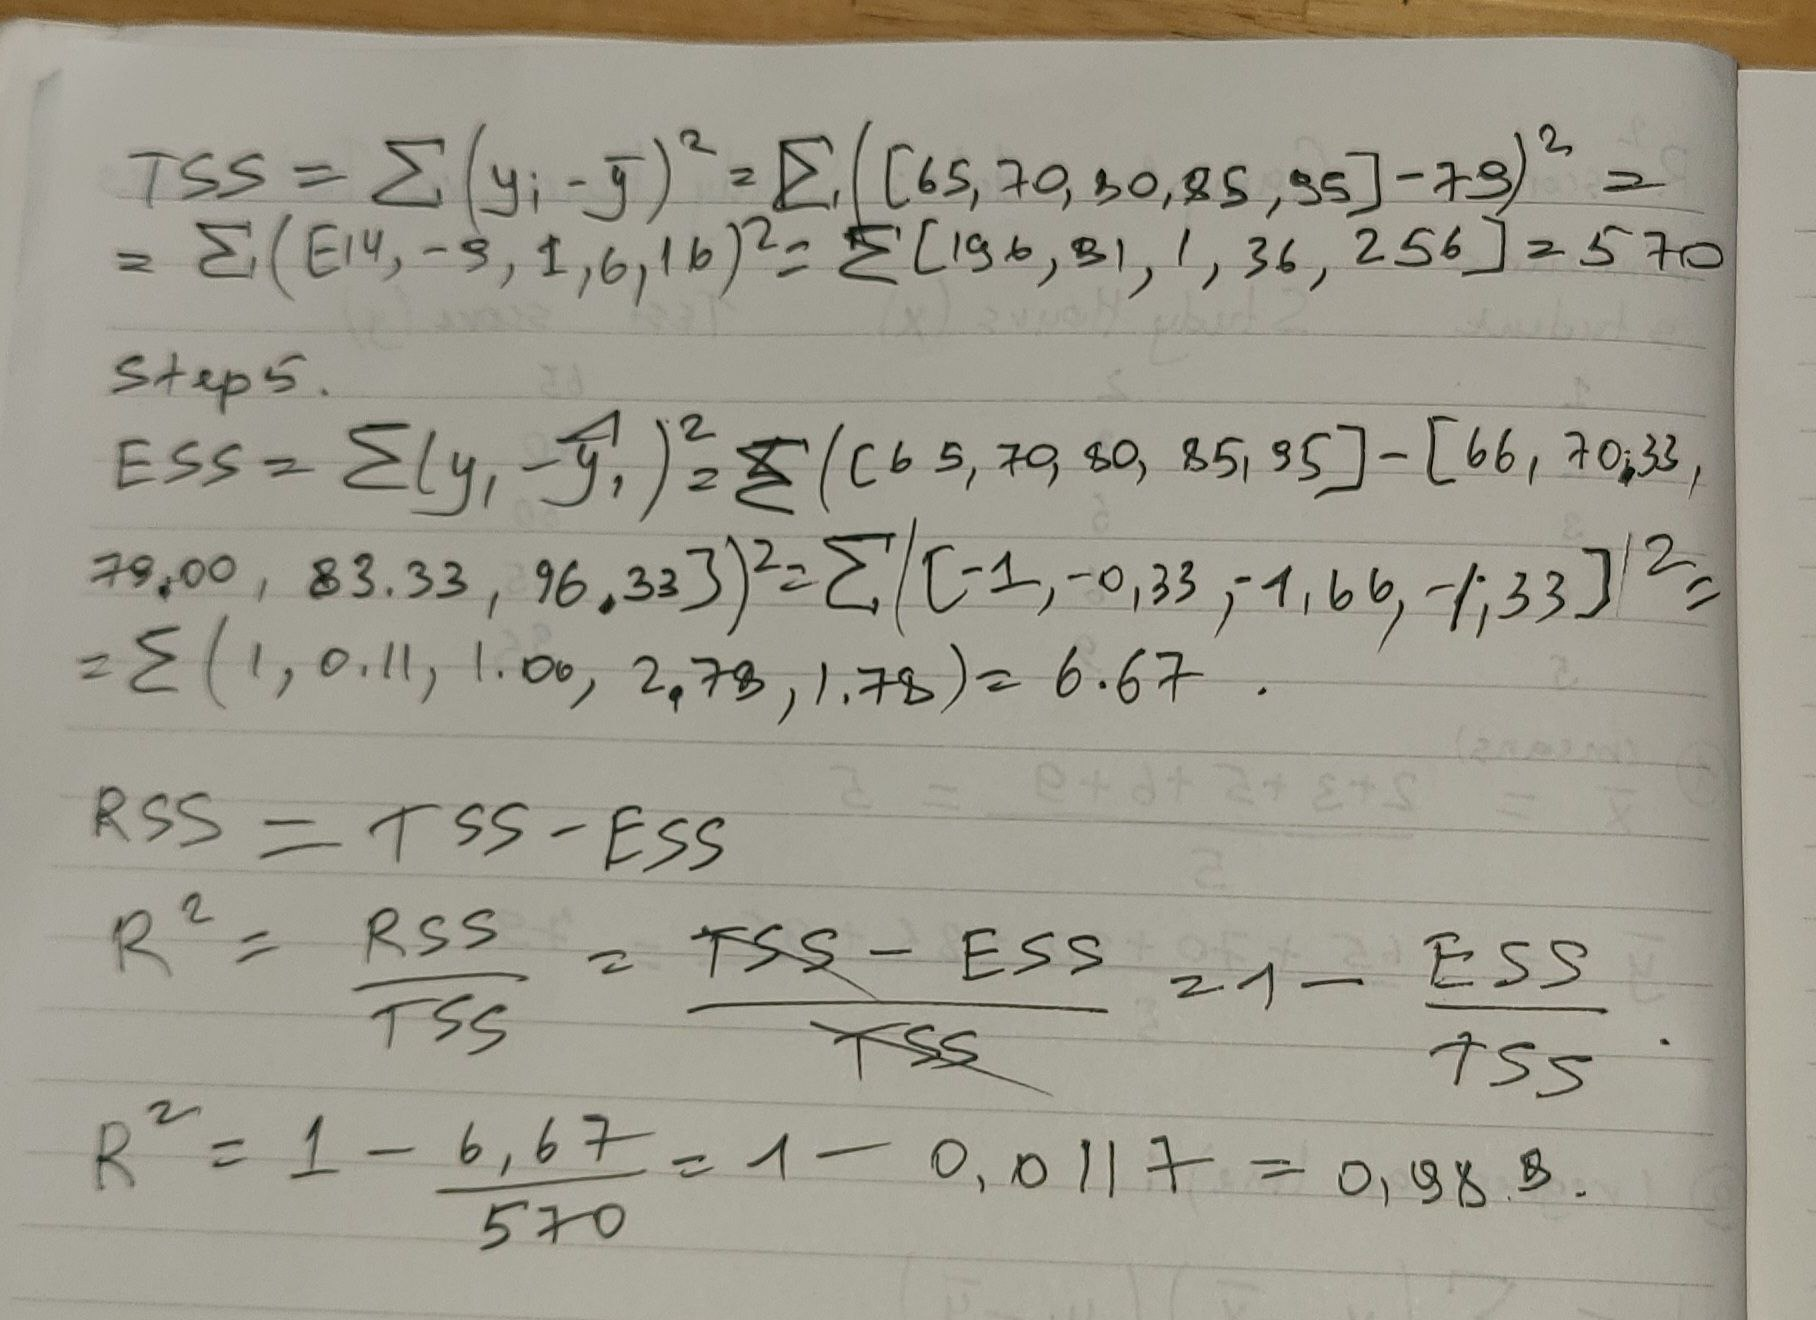
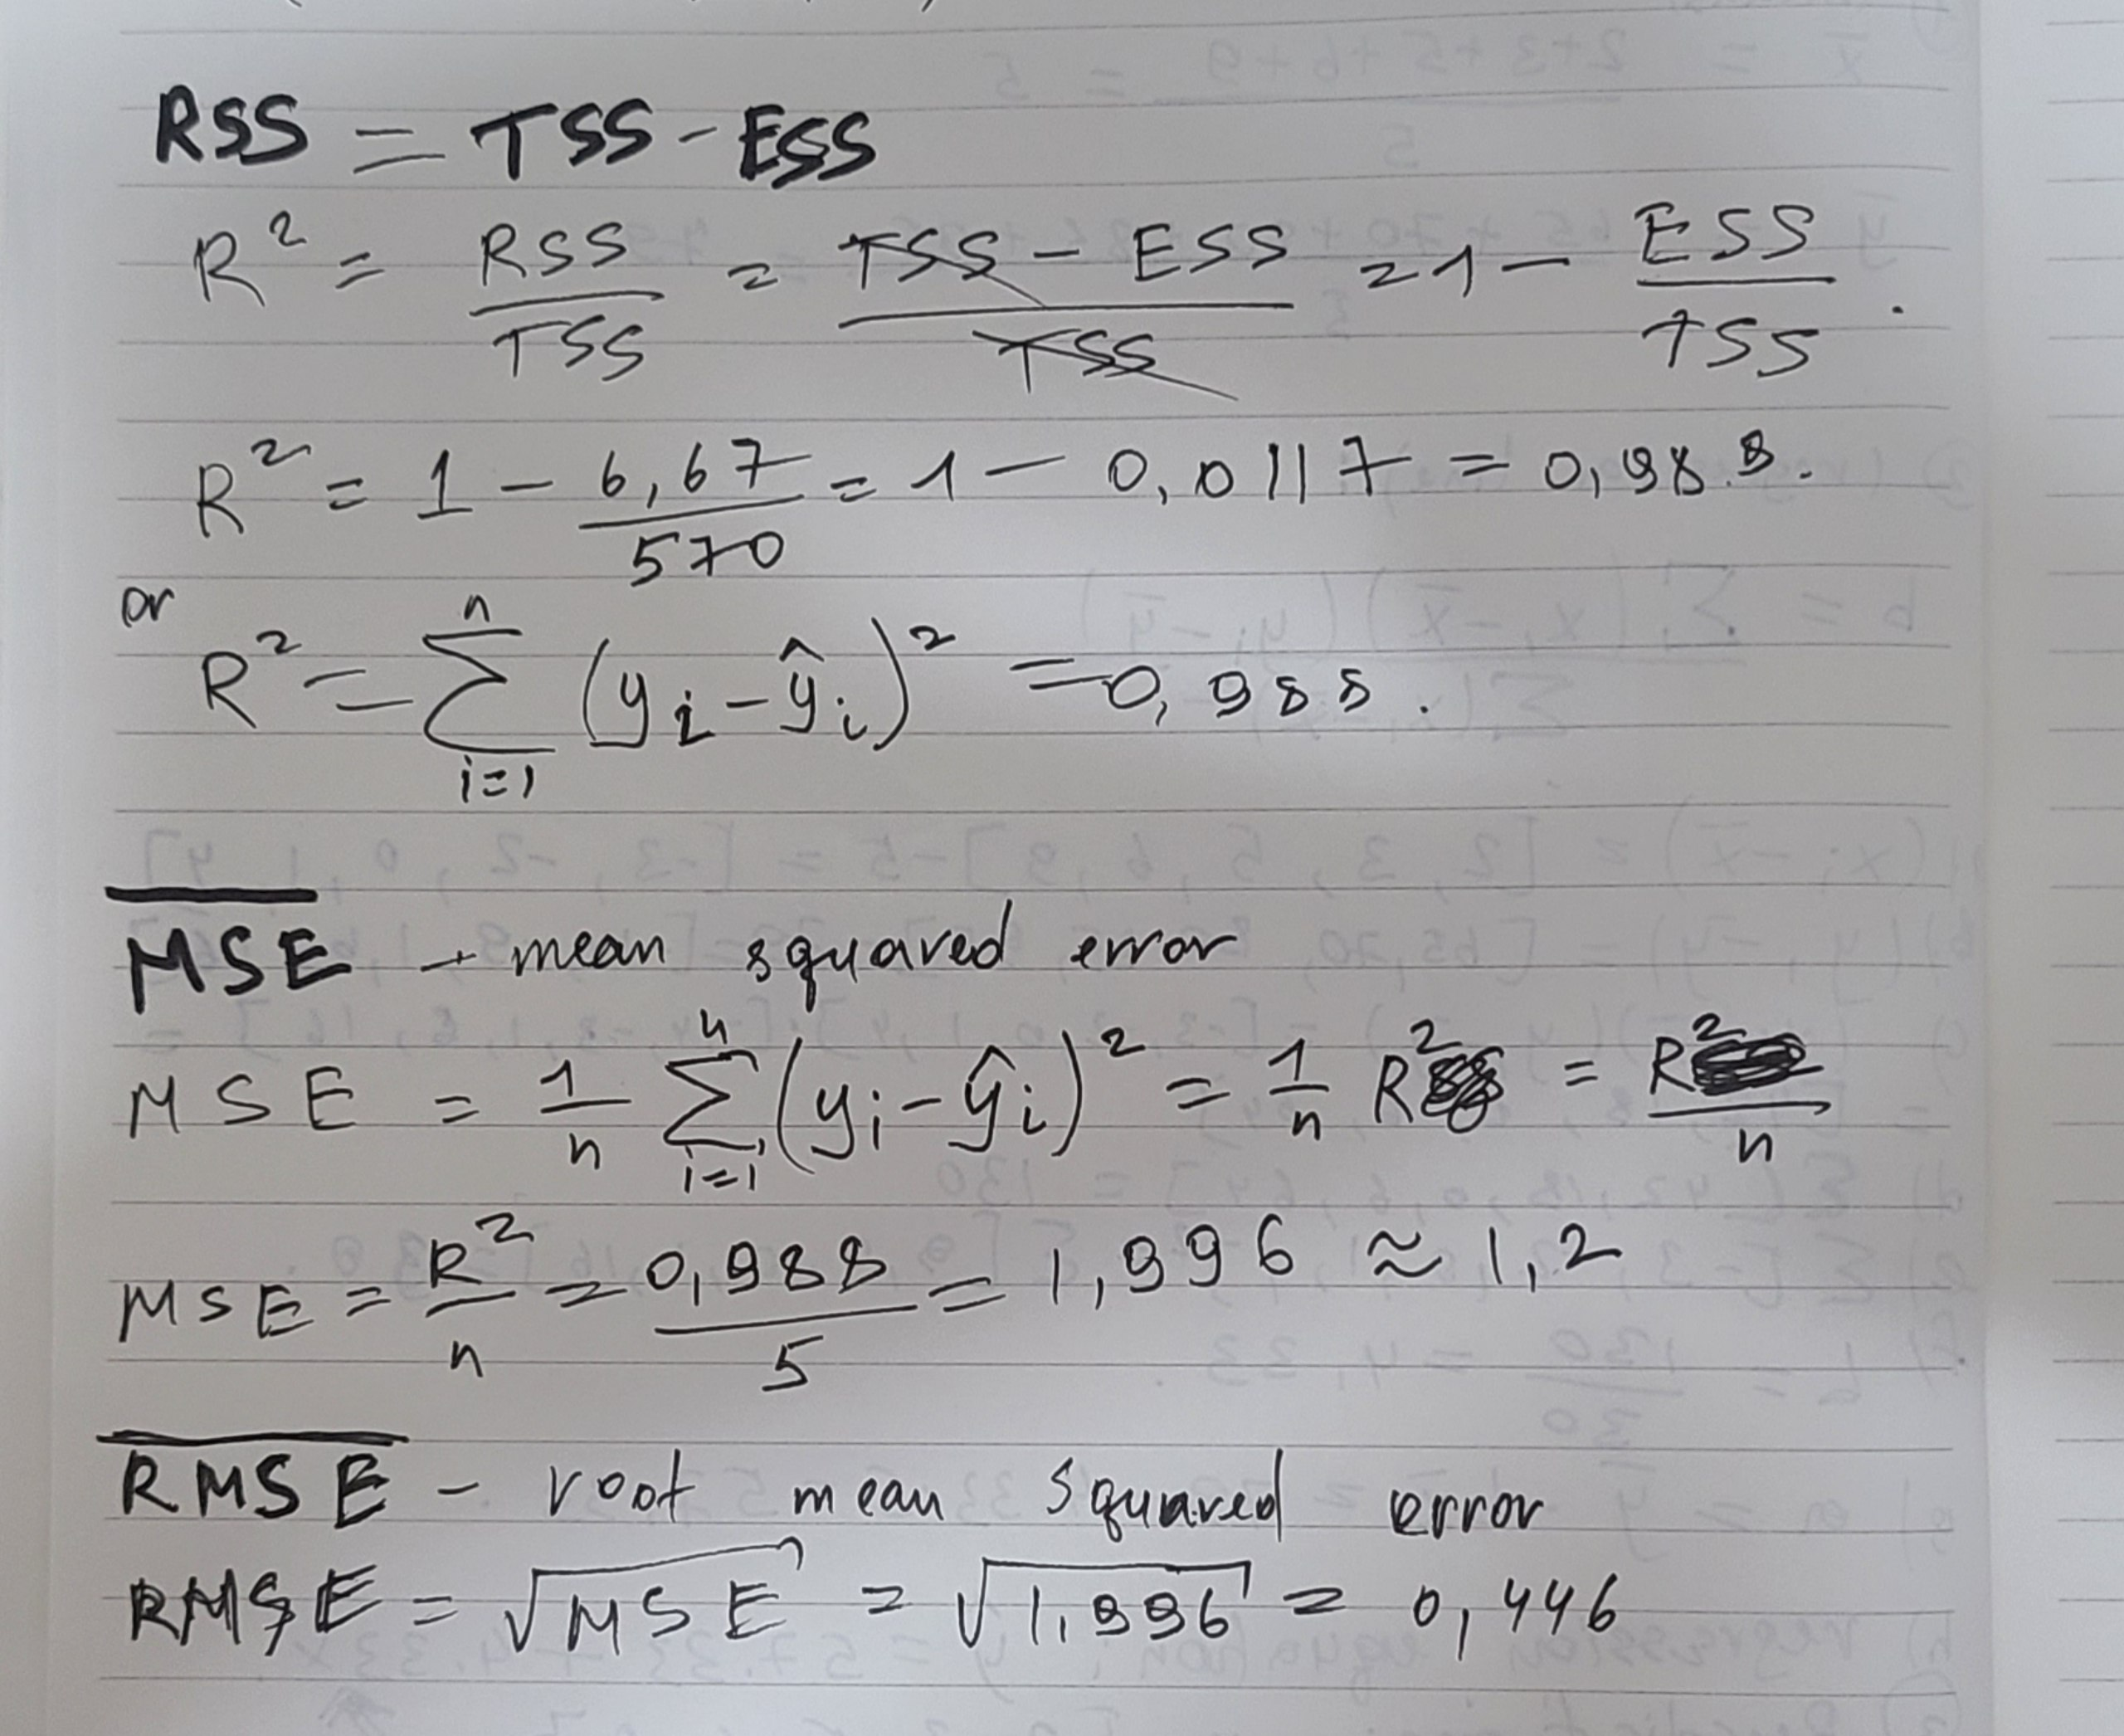

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

reg_all = LinearRegression()

## Student GPA regression example:
student_df = pd.DataFrame({"studyHours": [2,3,5,6,9], "testScore": [65,70,80,85,95]})
X = student_df["studyHours"].values.reshape(-1, 1)
y = student_df["testScore"].values

reg_all.fit(X, y)

y_pred = reg_all.predict(X)

r_score = reg_all.score(X, y)
mse = mean_squared_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)

print("Predictions", y_pred)

print("R-squared Score:", r_score)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Predictions [66.         70.33333333 79.         83.33333333 96.33333333]
R-squared Score: 0.9883040935672515
Mean Squared Error: 1.3333333333333315
Root Mean Squared Error: 1.1547005383792508

------------------------------------------
✅ Runtime: 3.4 ms | 💾 Mem: 206.91 MB (Δ +0.09 MB) | ⚙️ CPU: 20.9%


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression

X = diabetes_df.drop("Glucose", axis=1).values
y = diabetes_df["Glucose"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

## Prediction
y_pred = reg_all.predict(X_test)

## Scoring the R-squared
# R^2 = 1 - (Unexplained Variation / Total Variation)
# Ranges from 0 to 1, showing how regression line fits the data
r_score = reg_all.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print("R-squared Score:", r_score)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)



R-squared Score: 0.2829901844689485
Mean Squared Error: 619.8683886178819
Root Mean Squared Error: 24.897156235559954

------------------------------------------
✅ Runtime: 14.3 ms | 💾 Mem: 286.66 MB (Δ -1.31 MB) | ⚙️ CPU: 26.8%


### Cross Validation

In [8]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=6, shuffle=True, random_state=11)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
print(cv_results)

[0.14161749 0.41595027 0.15332514 0.34681355 0.42529686 0.33597966]

------------------------------------------
✅ Runtime: 12.9 ms | 💾 Mem: 207.25 MB (Δ +0.22 MB) | ⚙️ CPU: 18.6%


### Evaluating CV Performance

In [9]:
def cv_evualuation(cv_resultss): 
    print("Scores:", cv_resultss)
    print("Mean:", np.mean(cv_resultss))
    print("Standart Deviation (Values far away from mean):", np.std(cv_resultss))
    print("Quantile:", np.quantile(cv_resultss, [0.025, 0.975]))

cv_evualuation(cv_results)

Scores: [0.14161749 0.41595027 0.15332514 0.34681355 0.42529686 0.33597966]
Mean: 0.30316382645021744
Standart Deviation (Values far away from mean): 0.1148682483754395
Quantile: [0.14308095 0.42412854]

------------------------------------------
✅ Runtime: 1.9 ms | 💾 Mem: 207.36 MB (Δ +0.11 MB) | ⚙️ CPU: 20.9%


## Regularized Regressions
### 1. Ridge

In [10]:
from sklearn.linear_model import Ridge


rscores = []
for alpha in [0.1, 1, 10, 100, 1000]:
    ridge_reg = Ridge(alpha=alpha) # default alpha=1
    
    ## Cross Validation
    # cv_results = cross_val_score(ridge_reg, X, y, cv=kf)
    # cv_evualuation(cv_results)
    
    ridge_reg.fit(X_train, y_train)
    ridge_y_pred = ridge_reg.predict(X_test)
    rscores.append(ridge_reg.score(X_test, y_test))

cv_evualuation(rscores)

Scores: [0.2830221482075358, 0.2832932606616132, 0.2846338327526551, 0.2611002868829311, 0.18961523374044975]
Mean: 0.260332952449037
Standart Deviation (Values far away from mean): 0.03642552040093609
Quantile: [0.19676374 0.28449978]

------------------------------------------
✅ Runtime: 13.7 ms | 💾 Mem: 207.70 MB (Δ +0.34 MB) | ⚙️ CPU: 0.0%


### 2. Lasso 

In [11]:
from sklearn.linear_model import Lasso


lscores = []
for alpha in [0.1, 1, 10, 100, 1000]:
    lasso_reg = Lasso(alpha=alpha) # default alpha=1
    
    ## Cross Validation
    # cv_results = cross_val_score(lasso_reg, X, y, cv=kf)
    # cv_evualuation(cv_results)
    
    lasso_reg.fit(X_train, y_train)
    lasso_y_pred = lasso_reg.predict(X_test)
    lscores.append(lasso_reg.score(X_test, y_test))

cv_evualuation(lscores)

Scores: [0.2863365889443378, 0.29629718577718844, 0.1641458803386603, 0.09985050853773803, 0.045817895081441185]
Mean: 0.17848961173587313
Standart Deviation (Values far away from mean): 0.09949998047913305
Quantile: [0.05122116 0.29530113]

------------------------------------------
✅ Runtime: 14.5 ms | 💾 Mem: 207.14 MB (Δ -0.56 MB) | ⚙️ CPU: 0.0%


### Lasso for feature selection in scikit-learn

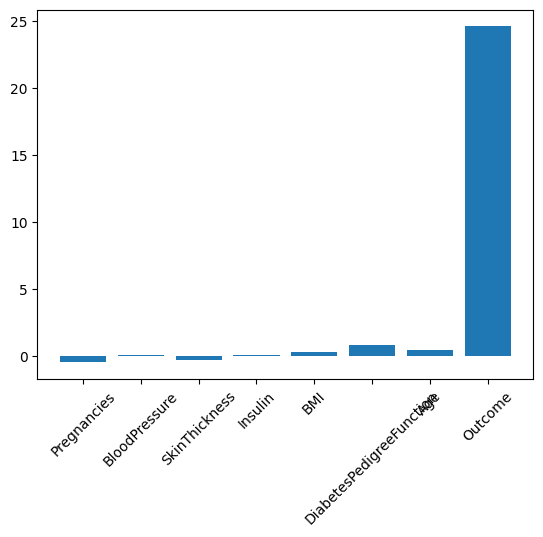


------------------------------------------
✅ Runtime: 52.0 ms | 💾 Mem: 207.41 MB (Δ +0.27 MB) | ⚙️ CPU: 0.0%


In [12]:
names = diabetes_df.drop("Glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()